Link dataset: https://www.kaggle.com/datasets/ajayrana/hymenoptera-data

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory("drive/MyDrive/hymenoptera_data/train", image_size = (200, 200), batch_size = 32)

Found 245 files belonging to 2 classes.


In [ ]:
val_data = tf.keras.preprocessing.image_dataset_from_directory("drive/MyDrive/hymenoptera_data/val", image_size = (200, 200), batch_size = 32)

Found 153 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
print(class_names)

['ants', 'bees']


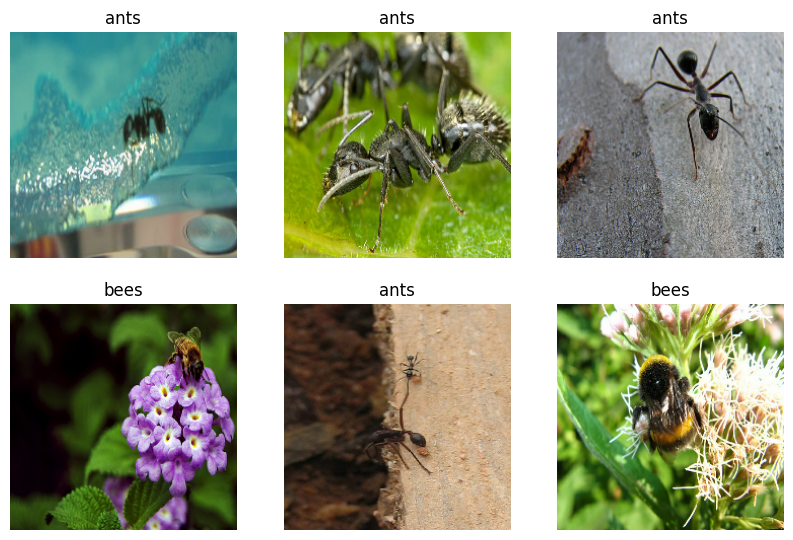

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Create the model

pretrained_model= tf.keras.applications.ResNet50(include_top=False, input_shape=(200, 200, 3), pooling='avg', weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable = False

model = Sequential([ pretrained_model,
                     Flatten(),
                     Dense(64, activation = 'relu'),
                     Dense(1, activation = 'sigmoid')
                   ])

Train the model

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
train_model = model.fit(train_data, validation_data = val_data, epochs = 15)

Epoch 1/15
8/8 [==============================] - 7s 354ms/step - loss: 0.6641 - accuracy: 0.6490 - val_loss: 0.4513 - val_accuracy: 0.8235
Epoch 2/15
8/8 [==============================] - 3s 271ms/step - loss: 0.2117 - accuracy: 0.9143 - val_loss: 0.3167 - val_accuracy: 0.8693
Epoch 3/15
8/8 [==============================] - 2s 210ms/step - loss: 0.1235 - accuracy: 0.9592 - val_loss: 0.3427 - val_accuracy: 0.8824
Epoch 4/15
8/8 [==============================] - 3s 266ms/step - loss: 0.0701 - accuracy: 0.9796 - val_loss: 0.2736 - val_accuracy: 0.9020
Epoch 5/15
8/8 [==============================] - 2s 209ms/step - loss: 0.0465 - accuracy: 0.9918 - val_loss: 0.3285 - val_accuracy: 0.9020
Epoch 6/15
8/8 [==============================] - 3s 268ms/step - loss: 0.0292 - accuracy: 1.0000 - val_loss: 0.3055 - val_accuracy: 0.9150
Epoch 7/15
8/8 [==============================] - 3s 237ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.3447 - val_accuracy: 0.9150
Epoch 8/15
8/8 [====

Plot the model's accuracy and loss

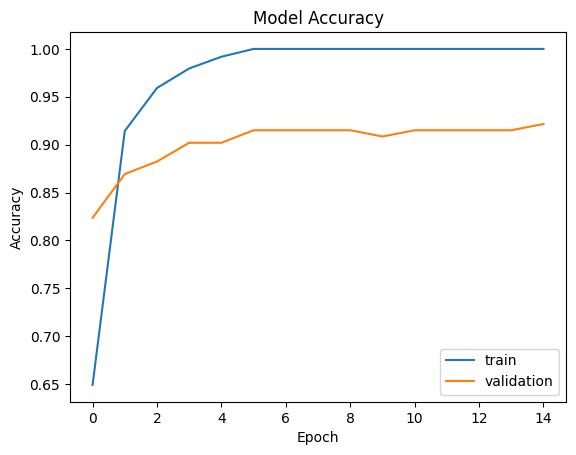

In [ ]:
plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

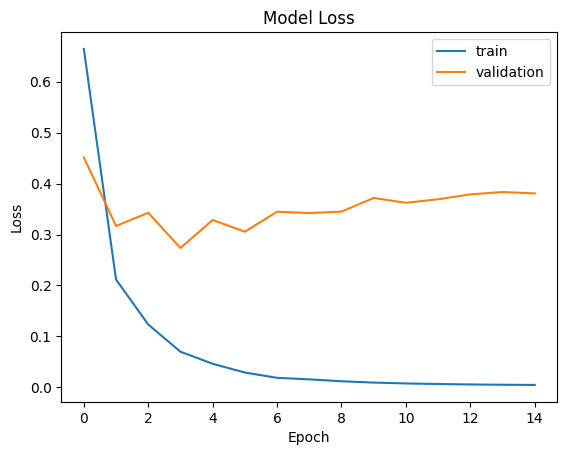

In [ ]:
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

**Analisis**

Dari hasil model training CNN, dapat dianalisiskan bahwa:

Pada epoch pertama, akurasi training berada pada nilai 0.649 dan loss training berada pada nilai 0.6641. Serta, pada bagian validation memiliki akurasi sebesar 0,8235 dan loss sebesar 0,4513. Dari epoch 1 sampai epoch 15, akurasi untuk training meningkat dan loss untuk akurasi menurun serta akurasi untuk validation terkadang menurun atau meningkat yang terjadi di beberapa epoch dan loss untuk validation juga mengalami peningkatan dan penurunan di epoch-epoch tertentu. Tetapi, akurasi validation terlihat stabil dan agak lebih rendah dibandingkan dengan akurasi training pada epoch-epoch berikutnya. Masalah tersebut merupakan overfitting, dimana model mencoba menyesuaikan sampel training secara berlebihan dan berkinerja buruk pada sampel validation. Sehingga, akurasi training menjadi lebih tinggi dibandingkan dengan akurasi validation.

Akurasi untuk training telah mencapai nilai maksimum (1) dari epoch 6 hingga epoch 15. Pada validation, besar nilai akurasi pada epoch 15 hampir mendekati 1 yaitu sebesar 0.9216. Loss dan akurasi pada training secara konsisten meningkat seiring bertambahnya epoch. Hal ini menunjukkan bahwa model tersebut telah bekerja dengan baik pada data training dan validation.

Dari hasil kedua visualisasi grafik, dapat dilihat bahwa pada Model Accuracy bagian training menaik dan telah mencapai titik angka maksimal yaitu 1. Sedangkan, validation mencapai angka maksimal sebesar 0,9216. Pada Model Loss, training mengalami penurunan loss hingga mencapai angka 0.005 sedangkan validation mengalami turun naik pada beberapa epoch dan mencapai nilai 0,3807 di epoch terakhir.  

Secara keseluruhan, dapat dikatakan bahwa model CNN telah menunjukkan kinerja yang baik dalam mengklasifikasikan antara lebah (bees) dan semut (ants). Dengan adanya bantuan pre-trained model ResNet50, model CNN telah menunjukkan kinerja yang baik dalam melakukan klasifikasi gambar dengan hasil akurasi dan loss yang bagus.

In [ ]:
model.evaluate(val_data)

5/5 [==============================] - 1s 94ms/step - loss: 0.3231 - accuracy: 0.9281


[0.3231255114078522, 0.9281045794487]

In [ ]:
# Prediction preprocessing

from tensorflow.keras.preprocessing import image

test_image1 = image.load_img('drive/MyDrive/hymenoptera_data/val/bees/abeja.jpg', target_size = (224, 224))
test_image2 = image.load_img('drive/MyDrive/hymenoptera_data/val/ants/854534770_31f6156383.jpg', target_size = (224, 224))

test_image1 = image.img_to_array(test_image1)
test_image2 = image.img_to_array(test_image2)

test_image1 = np.expand_dims(test_image1, axis = 0)
test_image2 = np.expand_dims(test_image2, axis = 0)

# Making predictions on two images

print(model.predict(test_image1))
print(model.predict(test_image2))

1/1 [==============================] - 2s 2s/step
[[0.99363697]]
1/1 [==============================] - 0s 36ms/step
[[0.00010414]]


In [ ]:
result1 = model.predict(test_image1)
result2 = model.predict(test_image2)

index1 = np.round(result1)
index2 = np.round(result2)

print(index1)
print(index2)

1/1 [==============================] - 0s 37ms/step
[[1.]]
[[0.]]


Classification

In [ ]:
if (index1 == 0):
    img_result1 = 'ant'
else:
    img_result1 = 'bee'


if (index2 == 0):
    img_result2 = 'ant'
else:
    img_result2 = 'bee'

print(f'Image 1 result: {img_result1}')
print()
print(f'Image 2 result: {img_result2}')

Image 1 result: bee

Image 2 result: ant


Dari hasil klasifikasi diatas, dapat disimpulkan bahwa model yang telah dibuat telah menunjukkan performa klasifikasi yang baik dalam mengklasifikasikan gambar semut (ants) dan lebah (bees) sesuai dengan kelompoknya atau class-nya masing-masing.